<h1 style="color:rgb(0,120,170)">Assignment 1: Bayes Classifier, Gaussian Classification, Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Task 1: On the Bayes optimal classifier</h2>

Suppose we have a two-class classification problem, where we denote
the two classes with $+1$ and $-1$. Further assume that the joint
distribution of $\mathbf{x}$ and $y$, $p(\mathbf{x},y)$, is known and that
the distributions of the two classes do not overlap, i.e.

$$
\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0.
$$

Determine an optimal classification function $g$ and compute the
generalization error using the zero-one loss function.


<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>

$$
\min\{p(\mathbf{x}|y=+1),p(\mathbf{x}|y=-1)\}=0. \implies \min\{\frac{p(y=+1|\mathbf{x})p(\mathbf{x})}{p(y=+1)},\frac{p(y=-1|\mathbf{x})p(\mathbf{x})}{p(y=-1)}\}=0 \implies \min\{\frac{p(y=+1|\mathbf{x})}{p(y=+1)},\frac{p(y=-1|\mathbf{x})}{p(y=-1)}\}=0 \implies 
\begin{cases} 
    p(y=+1|\mathbf{x})=0 &  \text{for} & p(y=+1|\mathbf{x})<p(y=-1|\mathbf{x})\frac{p(y=+1)}{p(y=-1)}\\
    p(y=-1|\mathbf{x})=0 &  \text{for} & p(y=-1|\mathbf{x})<p(y=+1|\mathbf{x})\frac{p(y=-1)}{p(y=+1)}
\end{cases}
$$
Then, the optimal classification function is
$$
g(\mathbf{x};w) =
\begin{cases} 
    >0 &  \text{for} & p(y=+1|\mathbf{x})>p(y=-1|\mathbf{x})\frac{p(y=+1)}{p(y=-1)}\\
    <0 &  \text{for} & p(y=+1|\mathbf{x})<p(y=-1|\mathbf{x})\frac{p(y=+1)}{p(y=-1)}
\end{cases}
\implies g(\mathbf{x};w) = p(y=+1|\mathbf{x}) - p(y=-1|\mathbf{x})\frac{p(y=+1)}{p(y=-1)} \\ 
\implies g(\mathbf{x};w)    = \ln\frac{p(y=+1|\mathbf{x})}{p(y=-1|\mathbf{x})} + \ln\frac{p(y=+1)}{p(y=-1)}
$$
by defining the loss function as 
$$
L(y,g(\mathbf{x};w))= 
    \begin{cases} 
    0 & \text{for} & y.g(\mathbf{x};w)>0 \\
    1 & \text{for} & y.g(\mathbf{x};w)<0 \\
    \end{cases}
$$
The the generalization error by using the zero-one loss function is
$$
R(g(.;w)) = \int_{X_1} p(\mathbf{x},y=-1)dx +\int_{X_{-1}} p(\mathbf{x},y=+1)dx = 
            \int_{X_1} p(y=-1|\mathbf{x})p(x)dx +\int_{X_{-1}} p(y=+1|\mathbf{x})p(x)dx = 
            \int_{g(\mathbf{x})>0} p(y=-1|\mathbf{x})p(x)dx +\int_{g(\mathbf{x})<0} p(y=+1|\mathbf{x})p(x)dx = 0
$$


<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classification task</h2>

Assume that the two classes in data set ${\tt DataSet1a}$ are
distributed according to multivariate normal distributions. 
* Estimate the means and covariance matrices as well as $p(y=+1)$ and $p(y=-1)$ from the data and print your results. 

<h3 style="color:rgb(208,90,80)">Code (10 points)</h3>

In [84]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random

#read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1a.csv', delimiter=',', skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
#further split features according to labels
Xpos=X[y==1]
Xneg=X[y==-1]

# Begin your code
mu_pos = np.mean(Xpos, axis=0)
print('the first mean values E(x|y=+1)=',mu_pos)
mu_neg = np.mean(Xneg, axis=0)
print('the second mean values E(x|y=-1)=',mu_neg)
cov_pos = np.cov(Xpos[:,0], Xpos[:,1])
print('the first covariance martix is ',cov_pos)
cov_neg = np.cov(Xneg[:,0], Xneg[:,1])
print('the second covariance martix is ',cov_neg)
Xpos_size = Xpos.shape[0]
Xneg_size = Xneg.shape[0]
X_size = X.shape[0]
p_pos = Xpos_size/X_size 
p_neg = Xneg_size/X_size
print('p(y=+1) = ',p_pos ,'\np(y=-1) = ',p_neg)

# End your code

the first mean values E(x|y=+1)= [-0.23072318  1.0973771 ]
the second mean values E(x|y=-1)= [0.72081505 2.3428049 ]
the first covariance martix is  [[ 0.97776086 -0.63279722]
 [-0.63279722  0.96214327]]
the second covariance martix is  [[1.18686086 0.55312556]
 [0.55312556 0.98948508]]
p(y=+1) =  0.675 
p(y=-1) =  0.325


* Implement an optimal classification function $g$ (see slide 11) by calculating the values of the corresponding parameters $\mathbf{A}$, $\mathbf{w}$ and $b$.

<h3 style="color:rgb(208,90,80)">Code (15 points)</h3>

In [85]:
# Begin your code
A = np.linalg.inv(cov_pos)-np.linalg.inv(cov_neg)
print('A=',A)
w = np.linalg.inv(cov_pos)@mu_pos-np.linalg.inv(cov_neg)@mu_neg
print('w=',w)
b = -0.5*mu_pos.T@np.linalg.inv(cov_pos)@mu_pos + 0.5*mu_neg.T@np.linalg.inv(cov_neg)@mu_neg -\
    0.5*np.log(np.linalg.det(cov_pos)) + 0.5*np.log(np.linalg.det(cov_neg)) +\
    np.log(p_pos) - np.log(p_neg)
print('b=',b)
# End your code

A= [[0.64132121 1.80808986]
 [1.80808986 0.44294787]]
w= [ 1.54525683 -1.02711802]
b= 3.098736069363357


* Visualize the classification function and the decision boundaries in a two-dimensional plot.

<h3 style="color:rgb(208,90,80)">Code (15 points)</h3>

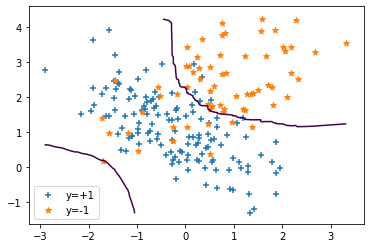

In [86]:
# Begin your code

plt.figure()
plt.scatter(Xpos[:, 0], Xpos[:, 1],marker ='+',label='y=+1')
plt.scatter(Xneg[:, 0], Xneg[:, 1],marker='*',label='y=-1' )
plt.legend()

X1 = np.sort(X[:,0])
X2 = np.sort(X[:,1])
XS = np.array([X1, X2])
g = -0.5*XS.T@A@XS + w.T@XS+b
xx, yy = np.meshgrid(X1,X2)
plt.contour(xx, yy, g, levels=[0])# 

# End your code

<h2 style="color:rgb(0,120,170)">Task 3: Maximum likelihood for exponential distribution</h2>

Given the model class $M$ of all exponential distributions with 
parameter
$\lambda$.
i.e. $M=\{f_{\lambda}(x) \mid \lambda > 0\}$ with

$$
      f_{\lambda}(x) = \begin{cases}\displaystyle
                         \lambda {\rm e}^{-\lambda x} & x \ge 0 \\
			0 & x < 0
                      \end{cases} 
$$

* Derive a formula for the maximum likelihood estimator $\lambda^*$ for the parameter $\lambda$. Hint: Maximize the logarithm of the likelihood function instead of the likelihood function itself.

<h3 style="color:rgb(210,90,80)">Calculation (20 points):</h3>
$$
 L(\lambda,\mathbf{x})=\prod_{i=1}^{n} f(x_i,\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i} 
$$
Logarithn likelihood function is 
$$
\ln (\lambda,\mathbf{x}) = \ln (\lambda^n \prod_{i=1}^{n} e^{-\lambda x_i}) = n \ln(\lambda) - \lambda \sum_{i=1}^{n} x_i 
$$
derivative is equal to zero
$$
\frac{\partial \ln (\lambda,\mathbf{x})}{\partial \lambda} = \frac{n}{\lambda}-\sum_{i=1}^{n} x_i =0
$$
Then
$$
\implies \lambda^{*} = \frac{n}{\sum_{i=1}^{n} x_i}
$$

* Apply the formula for $\lambda^*$ from the previous part to the data of ${\tt DataSet1b}$. Visualize the density defined by this optimal $\lambda^*$ and compare it to the true data distribution (e.g. by using a histogram).

<h3 style="color:rgb(208,90,80)">Code (20 points)</h3>

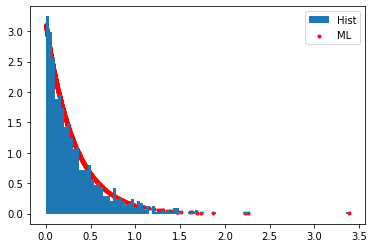

In [87]:
# load the data
data = np.genfromtxt('DataSet1b.csv', delimiter=',', skip_header=1)
# estimate the parameter according to the previously derived formula

# Begin your code
x = data 
n = np.size(x) 
lam = n/np.sum(x)

f = lam*np.exp(-lam*x)

plt.figure()
plt.scatter(x,f,marker='.',color='r', label='ML')
H = plt.hist(x,int(n/10), density=1, label='Hist')
plt.legend()

# End your code